In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get data

In [2]:
startlist = pd.read_csv("../data/vasaloppet_2023_startlist.csv")
results = pd.read_csv("../data/vasaloppet_2023.csv")

In [3]:
df = pd.merge(startlist, results, left_on=["Name", "Age class"], right_on=["Name", "Age class"], how="right")

In [4]:
df.head()

,Name,Age class,Start group,Team_x,Team_y,Place (gender),Time
0,"Persson, Emil (SWE)",H21,VL0,Östersunds SK,Lager 157 Ski Team,1,03:37:43
1,"Fleten, Emilie (NOR)",D21,VL0,"<span class=""text-muted"">–</span>",Team Ramudden,1,04:04:08
2,"Nygaard, Andreas (NOR)",H21,VL0,"<span class=""text-muted"">–</span>",Team Ragde Charge,2,03:37:43
3,"Öyre Slind, Silje (NOR)",D35,VL0,"<span class=""text-muted"">–</span>",Team Aker Daehlie,2,04:06:41
4,"Stadaas, Kasper (NOR)",H21,VL0,"<span class=""text-muted"">–</span>",Team Ragde Charge,3,03:37:44


In [5]:
duplicates = df.duplicated(subset=["Name", "Place (gender)", "Time"], keep=False)
df.loc[duplicates]
# Due to changing start group and team (multiple entries in start list - one per team?)

,Name,Age class,Start group,Team_x,Team_y,Place (gender),Time
26,"Johansson, Marcus (SWE)",H21,VL8,AXA SC,Lager 157 Ski Team,14,03:40:29
27,"Johansson, Marcus (SWE)",H21,VL9,Hammerdals IF,Lager 157 Ski Team,14,03:40:29
28,"Johansson, Marcus (SWE)",H21,VL0,Ulricehamns SK,Lager 157 Ski Team,14,03:40:29
29,"Johansson, Marcus (SWE)",H21,VL2,Träningskonsulten SC,Lager 157 Ski Team,14,03:40:29
39,"Eriksson, Gustav (SWE)",H21,VL4,Bålsta SK,IFK Mora SK,19,03:41:18
...,...,...,...,...,...,...,...
12662,"Johansson, Anton (SWE)",H21,VL10,AXA SC,AXA SC,9929,12:00:35
12663,"Johansson, Anton (SWE)",H21,VL4,AXA SC,AXA SC,9929,12:00:35
12699,"Persson, Lucas (SWE)",H21,VL10,AXA SC,AXA SC,9965,12:05:47
12700,"Persson, Lucas (SWE)",H21,VL9,IKJ Haninge,AXA SC,9965,12:05:47


In [6]:
#df.drop_duplicates(subset=["Name", "Age class", "Place (gender)", "Time"], inplace=True)

# I don't care about the team really
# Order by start group and keep first entry (best/latest start group)
df = df.sort_values(by="Start group").drop_duplicates(subset=["Name", "Place (gender)", "Time"]).drop(["Team_x", "Team_y"], axis=1)

In [7]:
df.shape
# Seems about right! 

(12075, 5)

## Data cleaning

In [8]:
df[["hours", "minutes", "seconds"]] = df.Time.str.split(":", expand=True)
df.head()

,Name,Age class,Start group,Place (gender),Time,hours,minutes,seconds
0,"Persson, Emil (SWE)",H21,VL0,1,03:37:43,03,37,43
330,"Tallbom, Patrik (SWE)",H21,VL0,160,04:07:09,04,07,09
328,"Wanvik, Kristian (NOR)",H40,VL0,159,04:06:50,04,06,50
326,"Liukkonen, Kalle (FIN)",H21,VL0,158,04:06:49,04,06,49
324,"Heir, Åsmund (NOR)",H21,VL0,157,04:06:39,04,06,39


In [9]:
df["time_hours"] = df["hours"].astype(float) + df["minutes"].astype(float) / 60 + df["seconds"].astype(float) / (60*60)
df.head()

,Name,Age class,Start group,Place (gender),Time,hours,minutes,seconds,time_hours
0,"Persson, Emil (SWE)",H21,VL0,1,03:37:43,03,37,43,3.628611
330,"Tallbom, Patrik (SWE)",H21,VL0,160,04:07:09,04,07,09,4.119167
328,"Wanvik, Kristian (NOR)",H40,VL0,159,04:06:50,04,06,50,4.113889
326,"Liukkonen, Kalle (FIN)",H21,VL0,158,04:06:49,04,06,49,4.113611
324,"Heir, Åsmund (NOR)",H21,VL0,157,04:06:39,04,06,39,4.110833


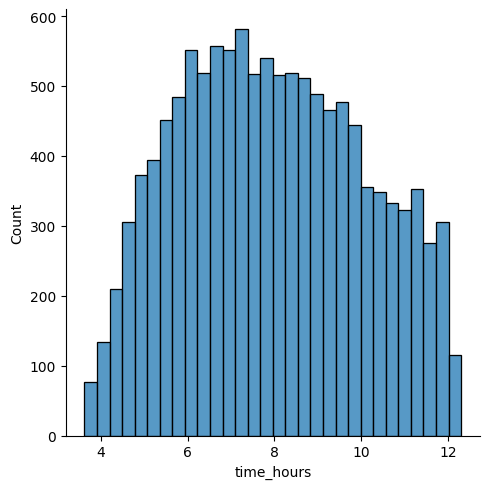

In [10]:
sns.displot(data=df, x="time_hours")

In [11]:
df["gender"] = df["Age class"].str[0]
df.tail()

,Name,Age class,Start group,Place (gender),Time,hours,minutes,seconds,time_hours,gender
10852,"Sandström, Niclas (SWE)",H35,VL9,8238,09:51:01,09,51,01,9.850278,H
417,"Abarbanell Österaas, Terese (SWE)",D40,NaN,203,06:22:45,06,22,45,6.379167,D
4044,"Suter, Adrian (SUI)",H50,NaN,1952,05:42:59,05,42,59,5.716389,H
9465,"Holgersson, Per-Arne (SWE)",H45,NaN,6942,08:50:09,08,50,09,8.835833,H
11074,"Divis, Zdenek (CZE)",H70,NaN,8449,10:04:56,10,04,56,10.082222,H


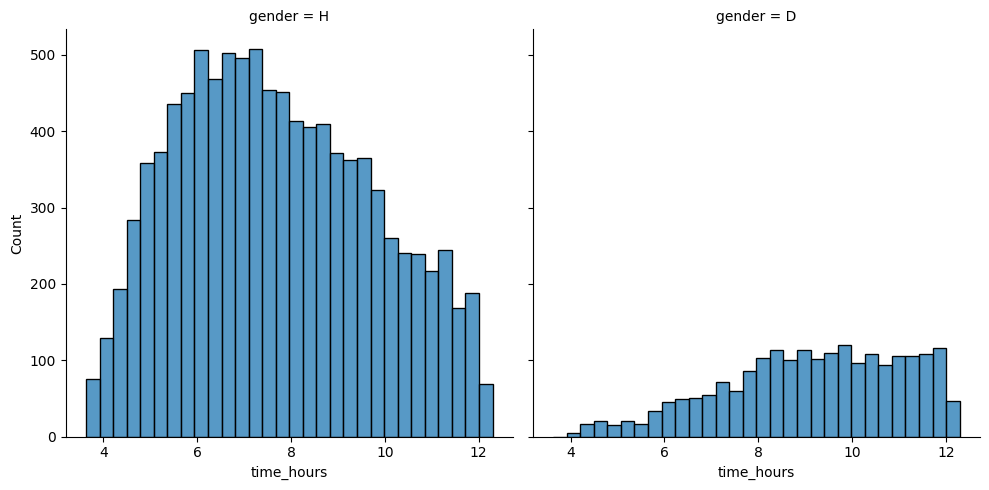

In [12]:
sns.displot(data=df.loc[df.gender != "<"], x="time_hours", col="gender")

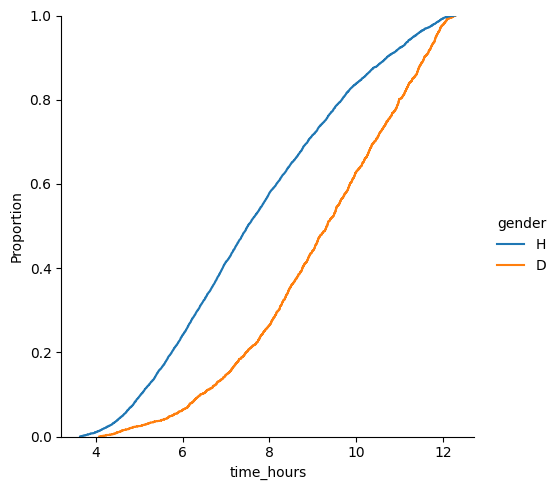

In [13]:
sns.displot(data=df.loc[df.gender != "<"], x="time_hours", hue="gender", kind="ecdf")

In [14]:
df["Place (total)"] = df["time_hours"].rank(method="first")
df.sort_values("time_hours").tail()

,Name,Age class,Start group,Place (gender),Time,hours,minutes,seconds,time_hours,gender,Place (total)
4323,"Johnsson, Emma (SWE)",D21,VL10,2083,12:16:56,12,16,56,12.282222,D,12071.0
12727,"Norberg, Lars (SWE)",H50,VL10,9991,12:16:57,12,16,57,12.282500,H,12072.0
12728,"Einarsson, Martin (SWE)",H21,VL10,9992,12:17:42,12,17,42,12.295000,H,12073.0
12729,"Nguyen, Dan (SWE)",H21,VL10,9993,12:17:43,12,17,43,12.295278,H,12075.0
4325,"Tran, Phiphi (SWE)",D21,VL10,2084,12:17:43,12,17,43,12.295278,D,12074.0


In [15]:
df.loc[df["Name"].isin(["Pihl, Morgan (SWE)", "Ström, Tobias (SWE)", "Ström, Philip (SWE)", "Nåbo, Joel (SWE)"])]
# Total place does not match vasaloppet.se perfectly, but very close

,Name,Age class,Start group,Place (gender),Time,hours,minutes,seconds,time_hours,gender,Place (total)
7279,"Ström, Tobias (SWE)",H35,VL5,4882,07:26:28,07,26,28,7.441111,H,5294.0
9969,"Ström, Philip (SWE)",H35,VL7,7403,09:11:37,09,11,37,9.193611,H,8402.0
9010,"Nåbo, Joel (SWE)",H21,VL7,6509,08:31:30,08,31,30,8.525000,H,7264.0
9047,"Pihl, Morgan (SWE)",H35,VL8,6546,08:33:34,08,33,34,8.559444,H,7310.0


In [16]:
# Percentile Morgan
(df["time_hours"] < 8.56).mean()

0.6054658385093168

In [17]:
# Percentile men Morgan
6549 / 9994

0.6552931759055434

In [18]:
# Percentile all Morgan
7312 / (9994 + 2084)

0.605398244742507

## Analysis by start group

In [19]:
START_GROUPS = ["VL0", "VL1", "VL2", "VL3", "VL4", "VL5", "VL6", "VL7", "VL8", "VL9", "VL10"]

In [20]:
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

df.groupby("Start group").agg({"time_hours": ["count", "mean", "std", q1, "median", q3]}).loc[START_GROUPS].round(1)

time_hours                             
                 count  mean  std   q1 median    q3
Start group                                        
VL0                341   4.3  0.8  4.0    4.1   4.4
VL1                437   4.7  0.6  4.5    4.6   4.8
VL2                640   5.2  0.5  4.9    5.1   5.3
VL3                931   5.7  0.6  5.4    5.6   5.9
VL4               1087   6.3  0.6  5.9    6.2   6.5
VL5               1212   7.0  0.9  6.5    6.8   7.2
VL6               1177   7.5  0.8  7.0    7.4   7.8
VL7               1215   8.1  0.8  7.6    8.0   8.5
VL8               1312   8.9  0.9  8.4    8.9   9.4
VL9               1163   9.9  1.0  9.2    9.8  10.6
VL10              2556  10.4  1.3  9.6   10.6  11.4

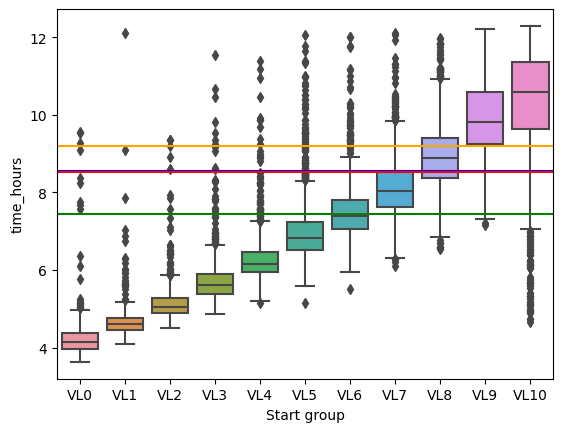

In [21]:
sns.boxplot(data=df, x="Start group", y="time_hours", order=START_GROUPS)
plt.hlines(y=8.56, xmin=-0.5, xmax=10.5, colors="blue")  # Morgan
plt.hlines(y=8.53, xmin=-0.5, xmax=10.5, colors="red")  # Joel
plt.hlines(y=7.44, xmin=-0.5, xmax=10.5, colors="green")  # Tobias
plt.hlines(y=9.19, xmin=-0.5, xmax=10.5, colors="orange")  # Philip

## Tolkning

* Seedningen är väldigt bra för startled 0-5 (inget överlapp för mittersta 50% i respektive startled)
* För startled 5-10 blir separationen mellan leden successivt sämre (stort överlapp mellan 9 och 10 framförallt - medianen för startled 10 är samma som 75 %ilen för startled 9)
* Det kan uppstå problem under loppet när åkare hamnar i "fel" startled - relativt långsamma åkare som blockerar spår och relativt snabba åkare som tvingas göra många passeringar
* Detta problem verkar vara störst för de högre startleden (5-9)
* Det går inte att göra mycket åt åkare som inte har åkt några seedningsgrundande lopp - vi vet ingenting om deras förmåga och måste placera dem i startled 10
* Det går heller inte att flytta upp åkare som har försämrats under försäsongen (åkte snabbare tidigare år än på seedningslopp under 2023 till exempel)
* Ytterligare en begränsning är att seedningen inte sätts individuellt utan utifrån tidsgränser som gäller för alla åkare för varje seedningsgrundande lopp


Vad som eventuellt skulle kunna förbättras är att placera relativt långsamma åkare (startled 5 och uppåt) i rätt led baserat på seedningslopp från 2023. Anekdotiskt verkar seedningen från Engelbrektsloppet ha varit sämre än seedningen från Moraloppet till exempel. 

Hur kan man bättre kalibrera seedningsloppen så att gränsvärdena för de olika startleden blir mer rättvisa och jämförbara?

Hur det verkar skötas idag:
* Utgå från vinnartiden för att dra gräns för första startledet 
* Utgå från kunskap om förmåga/meriter hos tätpersonerna för att dra gräns för det första startledet
* Sätta tidsgränser med jämna intervall (10, 15, 20 minuter) baserat på kunskap om väder/spårförhållanden (t.ex. om det snöade eller inte)

https://www.vasaloppet.se/wp-content/uploads/sites/1/2020/11/seedningslopp_vasaloppet_formular_for_arrangorer_2020.pdf

Möjliga förbättringar:
* Använda data (startled, sluttid, placering) från tidigare vasalopp för fler än tätpersonerna (VasaID ges vid anmälan till seedningslopp) för att avgöra var tidsgränserna borde vara
* Utgå från mediantid (eller kanske Q3) per startledsgrupp för varje lopp för att sätta tidsgränser
* Använd Bayes för att uppdatera uppskattad förmåga (hastighet?) efter varje lopp, sätt tidsgränser baserat på gruppering av uppskattad förmåga - fler lopp ger högre säkerhet

In [22]:
def percentile_for_group(time_hours: float, group: str) -> float:
    return (df.loc[df["Start group"] == group, "time_hours"] < time_hours).mean().round(2)

print(f"Tobias VL5: {percentile_for_group(7.44, 'VL5')}")
print(f"Tobias VL6: {percentile_for_group(7.44, 'VL6')}")
print(f"Joel VL7: {percentile_for_group(8.53, 'VL7')}")
print(f"Philip VL7: {percentile_for_group(9.19, 'VL7')}")
print(f"Morgan VL8: {percentile_for_group(8.56, 'VL8')}")
print(f"Morgan VL9: {percentile_for_group(8.56, 'VL9')}")


Tobias VL5: 0.82
Tobias VL6: 0.53
Joel VL7: 0.75
Philip VL7: 0.92
Morgan VL8: 0.33
Morgan VL9: 0.08


## Tolkning

* Tobias var långsammare än 82% av startled 5 (Vasaloppet 2022)
* Tobias var nära medianen av startled 6 (Moraloppet 2023)
* Joel var långsammare än 75% av startled 7 (Moraloppet 2023)
* Philip var långsammare än 92% av startled 7 (Moraloppet 2023 & Vasaloppet 2022)
* Morgan var snabbare än 67% av startled 8 (Vasaloppet 2022)
* Morgan var snabbare än 92% av startled 9 (Engelbrektsloppet 2023)


Sammanfattningsvis:
* Seedningen från Vasaloppet 2022 var optimistisk för Tobias och Philip (mindre träning den här säsongen, så ganska väntat) och korrekt för Morgan (ungefär samma nivå av träning och förberedelse)
* Seedningen från Moraloppet 2023 var optimistisk för Joel och Philip och korrekt för Tobias
* Seedningen från Engelbrektsloppet 2023 var pessimistisk för Morgan (kan bero delvis på sjukdom i samband med loppet)

# Nästa steg

* Hämta resultat från Vasaloppet 2022
    * Gruppera deltagare så att de någorlunda stämmer överens med startled för Vasaloppet 2023?
    * Gruppera deltagare baserat på placering?
* Hämta resultat från Engelbrektsloppet 2023 och Moraloppet 2023
* För båda seedningslopp:
    * Länka samman resultat med Vasaloppet 2022
    * Visualisera samband mellan resultaten
    * Föreslå tidsgränser för startled till Vasaloppet 2023
    * Utvärdera seedningen baserat på resultat från Vasaloppet 2023